<a href="https://colab.research.google.com/github/SharrolineGladia/project1/blob/main/actualrunning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [3]:
#!pip install PyDrive

In [4]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files


#gdrive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

#Other imports

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

#train

In [10]:
train = pd.read_csv('/content/drive/MyDrive/DT/train.csv')

In [11]:
# Specify the folder containing the images
image_folder_path = '/content/drive/MyDrive/DT/train'

# Create a list to store processed images
image_data = []

# Iterate over the rows of the DataFrame
for i in tqdm(range(train.shape[0])):
    # Construct the file path for the current image
    img_path = os.path.join(image_folder_path, train['Image Names'][i])

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(28, 28, 3), grayscale=False)
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values

    # Append the processed image to the list
    image_data.append(img)

# Convert the list to a numpy array
X = np.array(image_data)

100%|██████████| 139/139 [01:11<00:00,  1.96it/s]


In [12]:
y=train['Labels'].values
y = to_categorical(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#validation

In [16]:
# Load CSV file for validation data
validation_csv_path = '/content/drive/MyDrive/DT/validation.csv'
df_validation = pd.read_csv(validation_csv_path)
# Load and preprocess validation images
validation_image_data = []
for i in tqdm(range(df_validation.shape[0])):
    img_path = os.path.join('/content/drive/MyDrive/DT/validation', df_validation['Image Names'][i])
    img = image.load_img(img_path, target_size=(28, 28, 3), grayscale=False)
    img = image.img_to_array(img)
    img = img / 255.0
    validation_image_data.append(img)

X_validation = np.array(validation_image_data)

# Extract labels and one-hot encode them
y_validation = df_validation['Labels'].values
y_validation_one_hot = to_categorical(y_validation)

100%|██████████| 29/29 [00:13<00:00,  2.12it/s]


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#graph


Epoch 1/10
4/4 [==============================] - 0s 60ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3085 - val_accuracy: 0.8966
Epoch 2/10
4/4 [==============================] - 0s 53ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3098 - val_accuracy: 0.8966
Epoch 3/10
4/4 [==============================] - 0s 50ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2875 - val_accuracy: 0.8621
Epoch 4/10
4/4 [==============================] - 0s 54ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2862 - val_accuracy: 0.8621
Epoch 5/10
4/4 [==============================] - 0s 53ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2951 - val_accuracy: 0.8966
Epoch 6/10
4/4 [==============================] - 0s 53ms/step - loss: 8.0772e-04 - accuracy: 1.0000 - val_loss: 0.3056 - val_accuracy: 0.8966
Epoch 7/10
4/4 [==============================] - 0s 52ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3081 - val_accuracy: 0.8966
Epoch 8/10
4/4 [=======

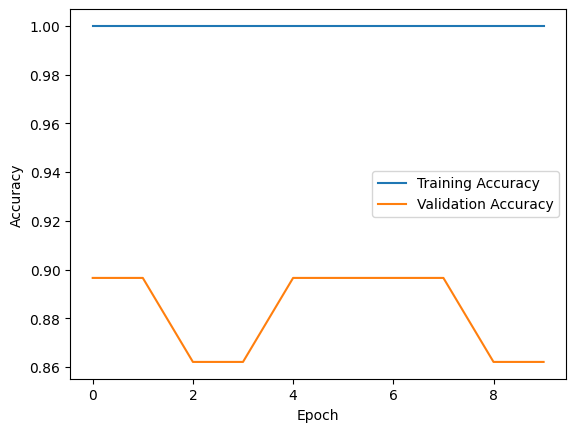

In [24]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation_one_hot))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#test

In [25]:
# Load CSV file for test data
test_csv_path = '/content/drive/MyDrive/DT/test.csv'
df_test = pd.read_csv(test_csv_path)

# Load and preprocess test images
test_image_data = []
for i in tqdm(range(df_test.shape[0])):
    img_path = os.path.join('/content/drive/MyDrive/DT/test', df_test['Image Names'][i])
    img = image.load_img(img_path, target_size=(28, 28, 3), grayscale=False)
    img = image.img_to_array(img)
    img = img / 255.0
    test_image_data.append(img)

X_test = np.array(test_image_data)




100%|██████████| 31/31 [00:14<00:00,  2.08it/s]


#prediction

In [26]:
# Assuming you have already defined 'num_classes' based on the number of classes in your problem
# Replace 'num_classes' with the actual number of classes in your problem
num_classes = 10  # Replace with your actual number of classes

# Use model.predict to get the raw predictions
raw_predictions = model.predict(X_test)

# Use numpy.argmax to get the index of the class with the highest probability for each sample
predicted_classes = np.argmax(raw_predictions, axis=1)

# If your labels are one-hot encoded, you might want to convert them back to categorical indices
# Skip this step if your labels are already categorical indices
# Replace 'num_classes' with the actual number of classes in your problem
predicted_classes_categorical = to_categorical(predicted_classes, num_classes=num_classes)

# Now, 'predicted_classes_categorical' contains the predicted classes in one-hot encoded format
# If you want the predicted classes in categorical index format, use 'predicted_classes'


1/1 [==============================] - 0s 84ms/step


#download


In [27]:
model.save('Wasteclass.keras')
files.download('Wasteclass.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#modelimplementation

In [28]:
from keras.models import load_model

model = load_model('/content/Wasteclass.keras')


In [41]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import tensorflow as tf

# Load your trained model
model = load_model('/content/Wasteclass.keras')

def take_photo(quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    return data

def preprocess_image(image_data):
    try:
        # Convert the base64 image data to bytes
        image_binary = b64decode(image_data.split(',')[1])

        # Convert bytes to numpy array
        image_np = np.frombuffer(image_binary, dtype=np.uint8)

        # Debugging: Print the shape of the numpy array
        print("Shape of image_np:", image_np.shape)

        # Decode the image
        img = cv2.imdecode(image_np, cv2.IMREAD_COLOR)

        if img is None:
            raise ValueError("Error decoding image with cv2.imdecode. Check if the image data is valid.")

        # Resize the image to match the model's input size
        img = cv2.resize(img, (28, 28))  # Resize to (28, 28)

        # Normalize pixel values
        img = img / 255.0

        return img

    except Exception as e:
        print(f"Error in preprocess_image: {str(e)}")
        return None


def classify_image(image_data):
    preprocessed_image = preprocess_image(image_data)
    if preprocessed_image is None:
        return None

    # Make predictions using the loaded model
    predictions = model.predict(np.expand_dims(preprocessed_image, axis=0))

    # Get the top prediction
    top_prediction_index = np.argmax(predictions, axis=1)[0]
    return top_prediction_index

def take_photo_and_classify(quality=0.8):
    try:
        # Capture photo
        image_data = take_photo(quality)

        # Preprocess the captured frame
        preprocessed_frame = preprocess_image(image_data)

        if preprocessed_frame is None:
            return "Error: Image preprocessing failed."

        # Make predictions using the loaded model
        predictions = model.predict(np.expand_dims(preprocessed_frame, axis=0))

        # Get the top prediction
        top_prediction_index = np.argmax(predictions, axis=1)[0]

        # Return the result
        return top_prediction_index

    except Exception as e:
        return f"Error: {str(e)}"

# Perform image capture and classification
result = take_photo_and_classify()

# Display the result (you can customize this part based on your needs)
if result is not None:
    if(result==1):
        print("Predicted class: Biodegradable")
    else:
        print("Predicted Class: Non Biodegradable")




<IPython.core.display.Javascript object>

Shape of image_np: (22784,)
1/1 [==============================] - 0s 71ms/step
Predicted class: Biodegradable
